# World Population Data Analysis

## Description

The goal of this notebook is to provide general insights on the world population. In this notebook, basic data pre-processing and presentation will be demonstrated.

## Importing Basic Libraries

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Pre-processing

Loading dataset to 'df' variable

In [83]:
df = pd.read_csv('world_population_data.csv')

In [84]:
#displaying the dataframe(first 5 elements)
df.head()

,rank,cca3,country,continent,2023 population,2022 population,2020 population,2015 population,2010 population,2000 population,1990 population,1980 population,1970 population,area (km²),density (km²),growth rate,world percentage
0,1,IND,India,Asia,1428627663,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590.0,481,0.81%,17.85%
1,2,CHN,China,Asia,1425671352,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961.0,151,-0.02%,17.81%
2,3,USA,United States,North America,339996563,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610.0,37,0.50%,4.25%
3,4,IDN,Indonesia,Asia,277534122,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569.0,148,0.74%,3.47%
4,5,PAK,Pakistan,Asia,240485658,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912.0,312,1.98%,3.00%


In [85]:
#Checking the dataframe size
df.shape

(234, 17)

In [86]:
#checking for empty or null values
df.isnull().sum()

rank                0
cca3                0
country             0
continent           0
2023 population     0
2022 population     0
2020 population     0
2015 population     0
2010 population     0
2000 population     0
1990 population     0
1980 population     0
1970 population     0
area (km²)          0
density (km²)       0
growth rate         0
world percentage    0
dtype: int64

In [87]:
#checking for duplicates
df.duplicated().sum()

0

In [88]:
#checking the data types
df.dtypes

rank                  int64
cca3                 object
country              object
continent            object
2023 population       int64
2022 population       int64
2020 population       int64
2015 population       int64
2010 population       int64
2000 population       int64
1990 population       int64
1980 population       int64
1970 population       int64
area (km²)          float64
density (km²)         int64
growth rate          object
world percentage     object
dtype: object

*The "growth rate" and "world percentage" data are strings. These are should be numeric data*

Converting 'growth rate' and 'world percentage' to numeric data type

In [89]:
#converting data in 'growth rate' column to numeric data
#done by removing the percent sign and converting to float32 data
df['growth rate'] = pd.to_numeric(df['growth rate'].str.strip('%'),downcast='float')
df['world percentage'] = pd.to_numeric(df['world percentage'].str.strip('%'),downcast='float')

In [90]:
df.dtypes

rank                  int64
cca3                 object
country              object
continent            object
2023 population       int64
2022 population       int64
2020 population       int64
2015 population       int64
2010 population       int64
2000 population       int64
1990 population       int64
1980 population       int64
1970 population       int64
area (km²)          float64
density (km²)         int64
growth rate         float32
world percentage    float32
dtype: object

In [91]:
#displaying the new dataframe
df.head()

,rank,cca3,country,continent,2023 population,2022 population,2020 population,2015 population,2010 population,2000 population,1990 population,1980 population,1970 population,area (km²),density (km²),growth rate,world percentage
0,1,IND,India,Asia,1428627663,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590.0,481,0.81,17.850000
1,2,CHN,China,Asia,1425671352,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961.0,151,-0.02,17.809999
2,3,USA,United States,North America,339996563,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610.0,37,0.50,4.250000
3,4,IDN,Indonesia,Asia,277534122,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569.0,148,0.74,3.470000
4,5,PAK,Pakistan,Asia,240485658,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912.0,312,1.98,3.000000


In [92]:
df.columns

Index(['rank', 'cca3', 'country', 'continent', '2023 population',
       '2022 population', '2020 population', '2015 population',
       '2010 population', '2000 population', '1990 population',
       '1980 population', '1970 population', 'area (km²)', 'density (km²)',
       'growth rate', 'world percentage'],
      dtype='object')

In [93]:
df.rename(columns={'growth rate': 'growth rate(%)', 'world percentage': 'world percentage(%)'}, inplace=True)

In [94]:
#displaying the new dataframe after column rename
df.head()

,rank,cca3,country,continent,2023 population,2022 population,2020 population,2015 population,2010 population,2000 population,1990 population,1980 population,1970 population,area (km²),density (km²),growth rate(%),world percentage(%)
0,1,IND,India,Asia,1428627663,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590.0,481,0.81,17.850000
1,2,CHN,China,Asia,1425671352,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961.0,151,-0.02,17.809999
2,3,USA,United States,North America,339996563,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610.0,37,0.50,4.250000
3,4,IDN,Indonesia,Asia,277534122,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569.0,148,0.74,3.470000
4,5,PAK,Pakistan,Asia,240485658,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912.0,312,1.98,3.000000


In [95]:
#exporting the extra-cleaned dataset to csv format
df.to_csv('world_population_data_2.csv', index=False)

In [96]:
#summing up world population per year
df_sum_pop = df.loc[:,'2023 population':'1970 population'].sum()
df_sum_pop

2023 population    8043615390
2022 population    7973413043
2020 population    7839250603
2015 population    7424809761
2010 population    6983785000
2000 population    6147055703
1990 population    5314191665
1980 population    4442400374
1970 population    3694136661
dtype: int64

In [97]:
#extracting the "year" from the index names then converting to pandas series
year = df_sum_pop.index #1-extract index
year = year.tolist() #2-convert index to list
year = [x.strip(' population') for x in year] #3-strip off white space and 'population' in every items on list
year = pd.Series(year) #4-converting into string again
year

0    2023
1    2022
2    2020
3    2015
4    2010
5    2000
6    1990
7    1980
8    1970
dtype: object

In [98]:
#extracting population data then converting to Series
population = df_sum_pop.tolist()
population = pd.Series(population)
population

0    8043615390
1    7973413043
2    7839250603
3    7424809761
4    6983785000
5    6147055703
6    5314191665
7    4442400374
8    3694136661
dtype: int64

In [99]:
#Creating a new data frame containing world population in years
df_world_pop = pd.concat([year, population], axis=1)
df_world_pop.columns = ['Year', 'Population']
df_world_pop = df_world_pop.sort_values(by=['Year'], ascending=True, ignore_index=True) #sorting the year
df_world_pop

,Year,Population
0,1970,3694136661
1,1980,4442400374
2,1990,5314191665
3,2000,6147055703
4,2010,6983785000
5,2015,7424809761
6,2020,7839250603
7,2022,7973413043
8,2023,8043615390


In [109]:
#Creating dataframe for population by continent
#df.groupby('continent').sum()
df_pop_cont = df.loc[:,'continent':'2023 population']
df_pop_cont = df_pop_cont.groupby('continent').sum()
df_pop_cont = df_pop_cont.sort_values(by='2023 population', ascending=False)

#converting index to series
continent = df_pop_cont.index.tolist()
continent = pd.Series(continent)

#converting data in dataframe to series
pop_2023 = df_pop_cont['2023 population'].tolist()
pop_2023 = pd.Series(pop_2023)

#concatinating the series
df_pop_cont = pd.concat([continent, pop_2023], axis=1)
df_pop_cont.columns = ['continent', '2023_pop']
df_pop_cont

,continent,2023_pop
0,Asia,4751819588
1,Africa,1460476458
2,Europe,741869197
3,North America,604155369
4,South America,439719009
5,Oceania,45575769


## Exploratory Data Analyt

### World Population Through Decades

In [101]:
#setting seaborn chart style as default
sns.set()

#bar color default
bar_color_default = 'midnightblue'

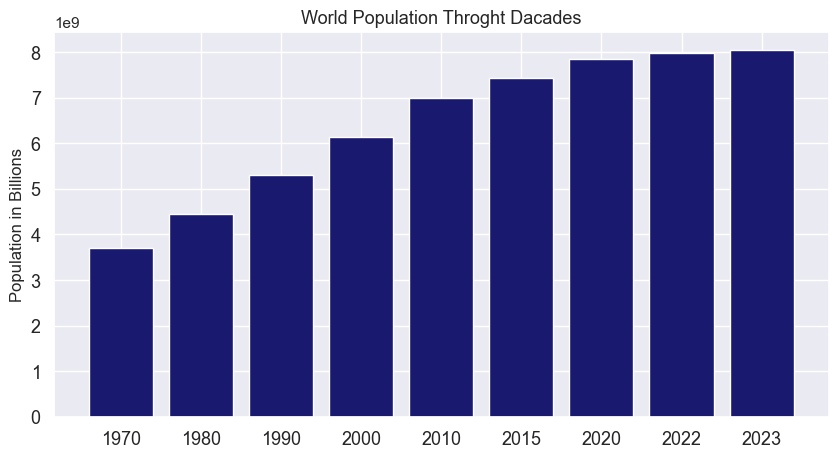

In [102]:
plt.figure(figsize=(10,5))
plt.bar(df_world_pop['Year'],
       df_world_pop['Population'],
       color = bar_color_default)
plt.xticks(fontsize = 13)
plt.yticks(fontsize=13)
plt.ylabel("Population in Billions")
plt.title("World Population Throght Dacades", fontsize=13)
plt.show()

#grouped bar plot is desirable

## Top 20 Most Populous Countries in 2023

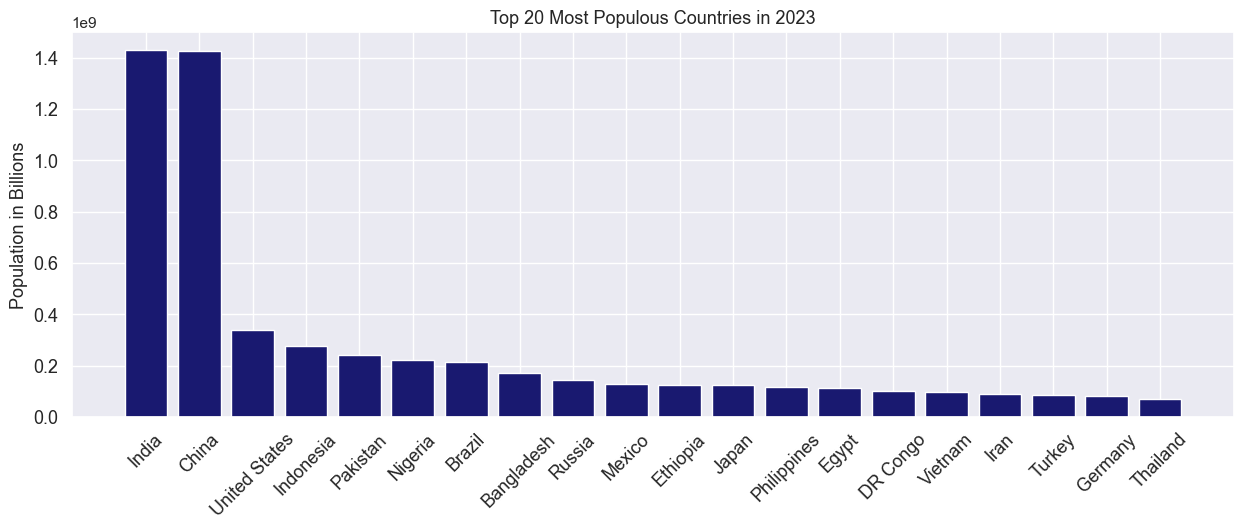

In [103]:
df_top_20 = df.head(20)
plt.figure(figsize=(15,5))
plt.bar(df_top_20['country'],
       df_top_20['2023 population'],
       color = bar_color_default)
plt.xticks(rotation=45, fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel("Population in Billions", fontsize=13)
plt.title("Top 20 Most Populous Countries in 2023", fontsize=13)
plt.show()

## Top 20 Countries by Population Density

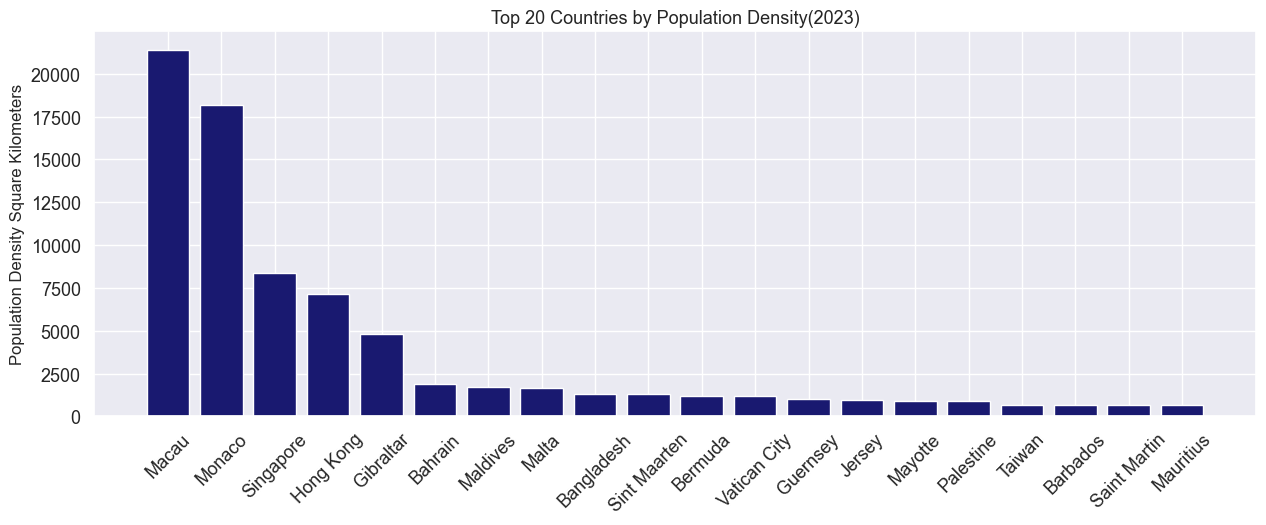

In [104]:
#creationg new dataframe for density
df_den_20 = df.sort_values(by=['density (km²)'], ascending=False, ignore_index=True)
df_den_20 = df_den_20.head(20)
df_den_20 = df_den_20.head(20)

#charting the data
plt.figure(figsize=(15,5))
plt.bar(df_den_20['country'],
       df_den_20['density (km²)'],
       color = bar_color_default)
plt.xticks(rotation=45, fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel("Population Density Square Kilometers")
plt.title("Top 20 Countries by Population Density(2023)", fontsize=13)
plt.show()

## Relationship Between Land Area and Population

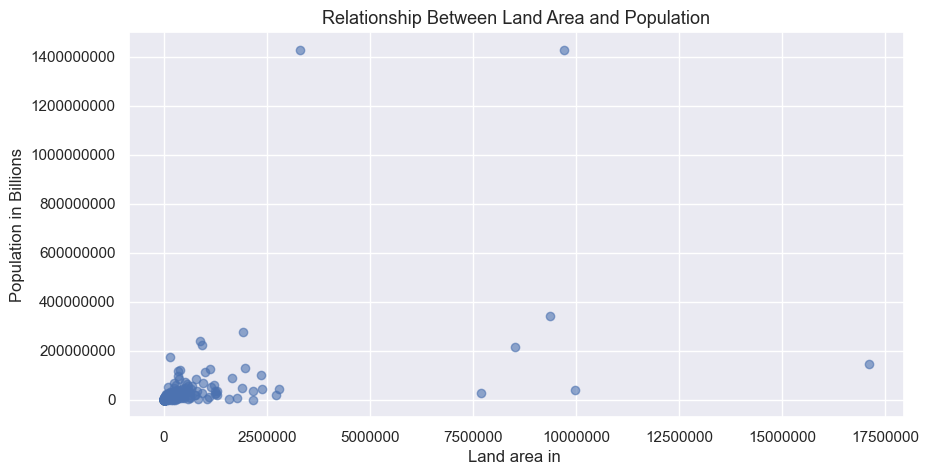

In [105]:
plt.figure(figsize=(10,5))
plt.scatter(df['area (km²)'],
           df['2023 population'],
           alpha = 0.6)
plt.title("Relationship Between Land Area and Population", fontsize=13)
plt.ylabel("Population in Billions")
plt.xlabel("Land area in ")
plt.ticklabel_format(style='plain')
plt.show()

## Top 20 Most Populous Countries in 1970

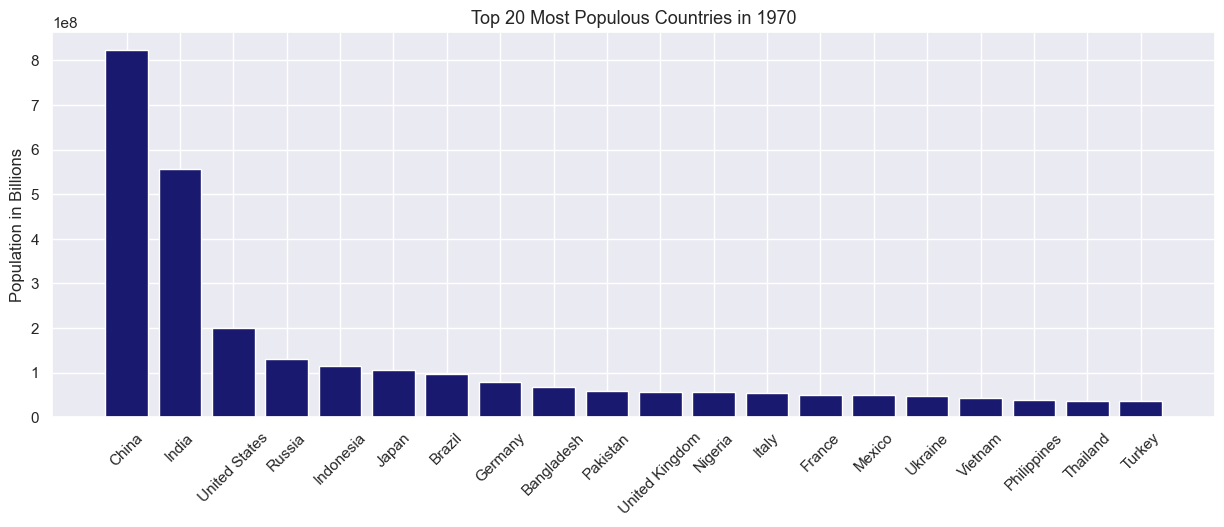

In [106]:
#sort and only show top 20
df_top_1970 = df.sort_values(by='1970 population', ascending=False, ignore_index=True)
df_top_1970 = df_top_1970.head(20)

#charting the result
plt.figure(figsize=(15, 5))
plt.bar(df_top_1970['country'],
       df_top_1970['1970 population'],
       color = bar_color_default)
plt.xticks(rotation=45)
plt.ylabel("Population in Billions")
plt.title("Top 20 Most Populous Countries in 1970", fontsize=13)
plt.show()

## Population by Continent (2023)

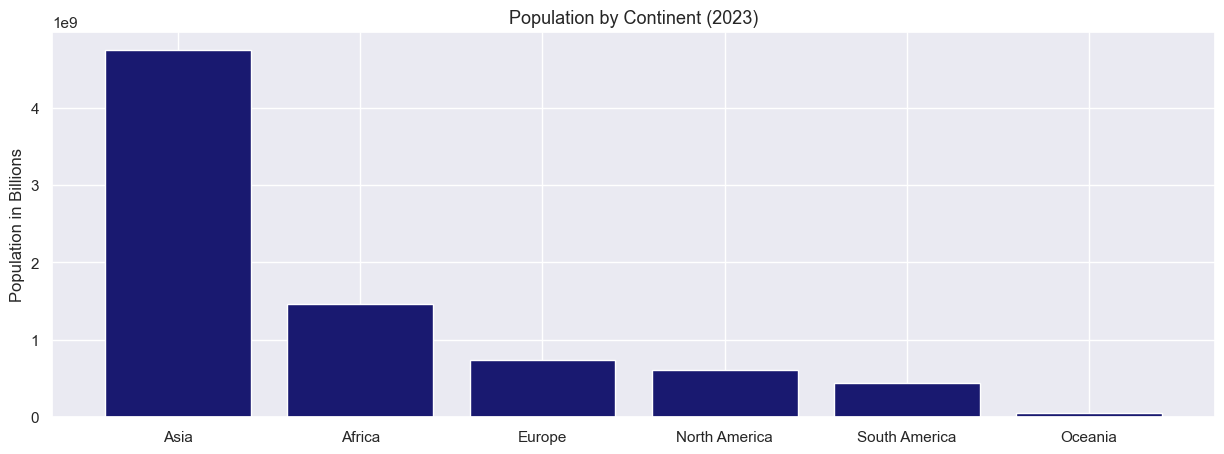

In [111]:
#charting the result
plt.figure(figsize=(15, 5))
plt.bar(df_pop_cont['continent'],
       df_pop_cont['2023_pop'],
       color = bar_color_default)
plt.ylabel("Population in Billions")
plt.title("Population by Continent (2023)", fontsize=13)
plt.show()